In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

C:\Users\loren\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\loren\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("../solutions/galaxyquasar.csv")

In [3]:
data

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


In [4]:
# i create the arrays for the colors
u_g = np.array(data['u'] - data['g'])
g_r = np.array(data['g'] - data['r'])
r_i = np.array(data['r'] - data['i'])
i_z = np.array(data['i'] - data['z'])

In [5]:
'''le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
data['class'] = le.fit_transform(data['class'])
labels = le.inverse_transform(data['class'])
class_names = le.classes_
print(class_names)'''

lab = data['class']
lab

0           QSO
1        GALAXY
2        GALAXY
3        GALAXY
4           QSO
          ...  
49995    GALAXY
49996    GALAXY
49997    GALAXY
49998    GALAXY
49999    GALAXY
Name: class, Length: 50000, dtype: object

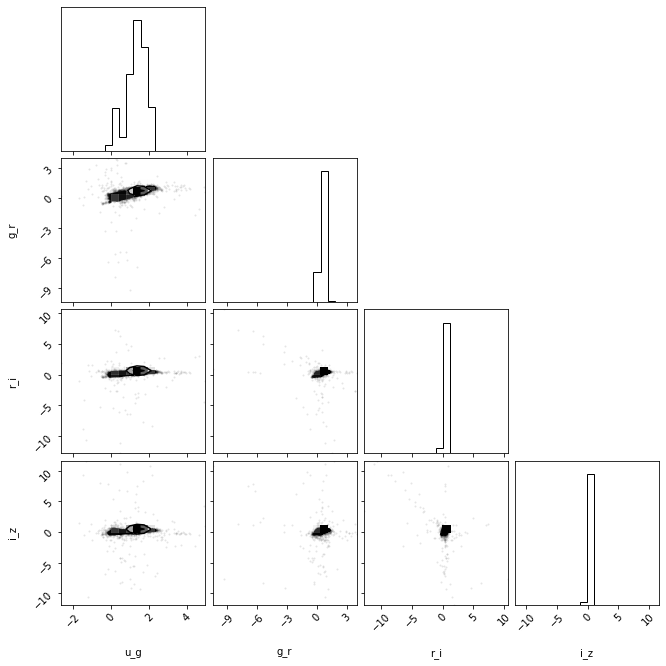

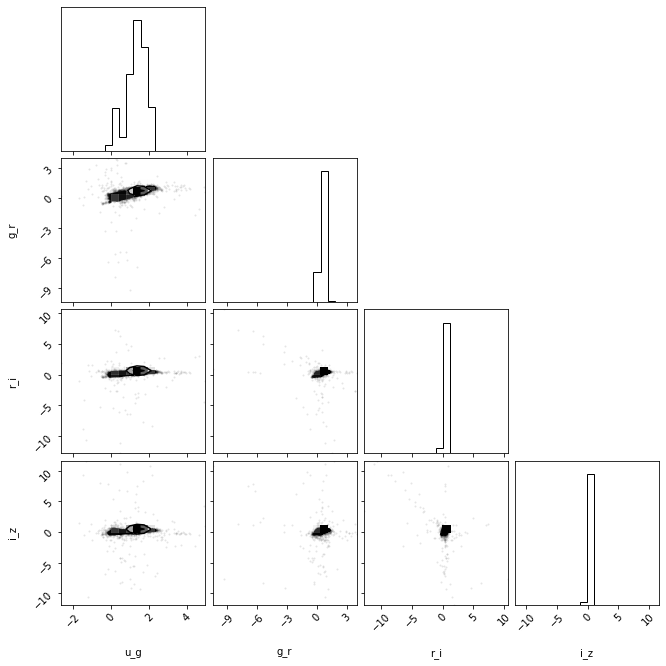

In [6]:
# let's plot
import corner
corner.corner(np.array([u_g, g_r, r_i, i_z]).T, labels = ['u_g', 'g_r', 'r_i', 'i_z'])

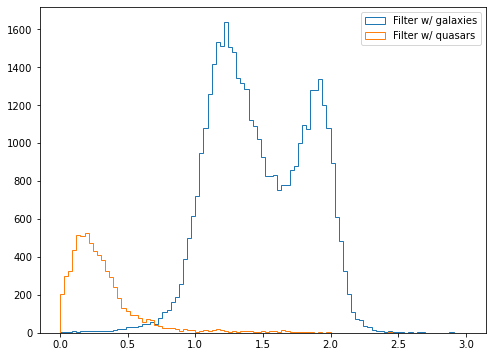

In [7]:
fig = plt.figure(figsize=(8, 6))
plt.hist(u_g[lab == 'GALAXY'], histtype = 'step', bins=np.linspace(0,3,100), label='Filter w/ galaxies')
plt.hist(u_g[lab == 'QSO'], histtype = 'step', bins=np.linspace(0,3,100), label='Filter w/ quasars')
plt.legend();

In [8]:
X = np.array([u_g, g_r, r_i, i_z]).T
y = np.array(lab == 'QSO', dtype=int)

In [9]:
import sklearn.model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from astroML.classification import GMMBayes
from sklearn.neighbors import KNeighborsClassifier

In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=43)

In [11]:
X_train.shape

(33500, 4)

Naive Bayes

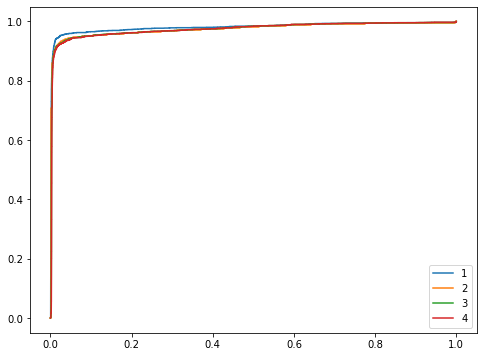

In [12]:
fig = plt.figure(figsize=(8, 6))
clf = GaussianNB()

for i in range(4):
    clf.fit(X_train[:,0:i+1], y_train)
    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(i+1))
plt.legend()
plt.show()

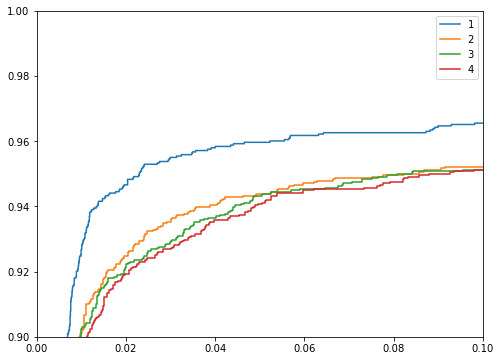

In [13]:
# let's cut it down a little
fig = plt.figure(figsize=(8, 6))
clf = GaussianNB()

for i in range(4):
    clf.fit(X_train[:,0:i+1], y_train)
    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(i+1))
plt.legend()
plt.xlim(0,0.1)
plt.ylim(0.9,1)
plt.show()

Quadratic Discriminant Analysis

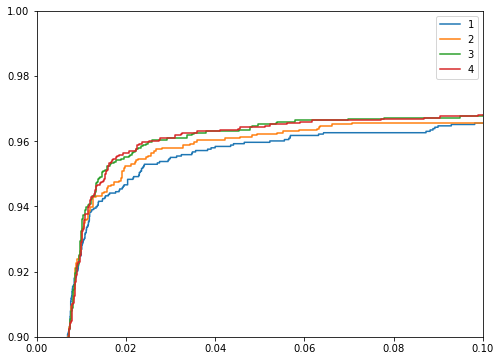

In [14]:
fig = plt.figure(figsize=(8, 6))
clf = QuadraticDiscriminantAnalysis()

for i in range(4):
    clf.fit(X_train[:,0:i+1], y_train)
    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(i+1))
plt.legend()
plt.xlim(0,0.1)
plt.ylim(0.9,1)
plt.show()

GMMBayes

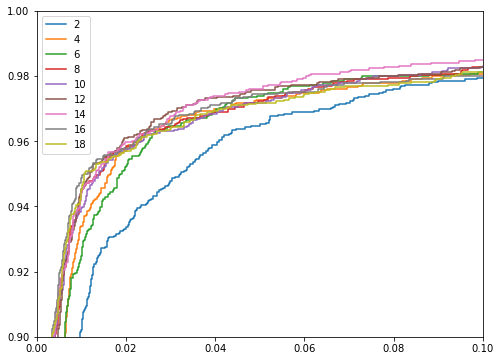

In [15]:
fig = plt.figure(figsize=(8, 6))

for n in np.arange(2, 20)[::2]:
    
    clf = GMMBayes(n_components = n)
    clf.fit(X_train[:,0:4], y_train)
    y_prob = clf.predict_proba(X_test[:,0:4]) [:,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(n))
plt.legend()
plt.xlim(0,0.1)
plt.ylim(0.9,1)
plt.show()

K Neighbors

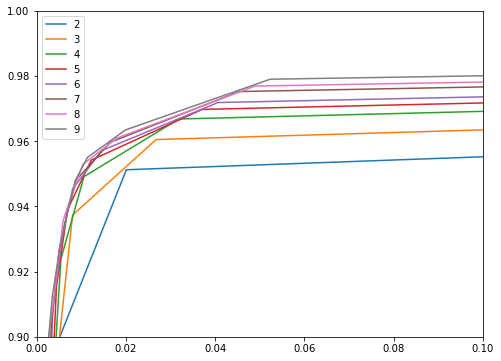

In [16]:
fig = plt.figure(figsize=(8, 6))

for n in np.arange(2, 10):
    
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train[:,0:4], y_train)
    y_prob = clf.predict_proba(X_test[:,0:4]) [:,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(n))
plt.legend()
plt.xlim(0,0.1)
plt.ylim(0.9,1)
plt.show()

The best model we found is GMMBayes!

In [17]:
clf = GMMBayes(n_components = 4)
clf.fit(X_train[:,0:4], y_train)
y_pred = clf.predict(X[:,0:4])

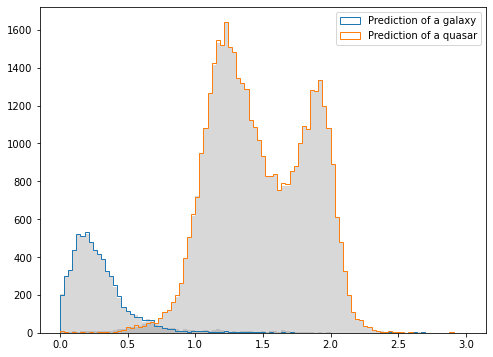

In [27]:
fig = plt.figure(figsize=(8, 6))
plt.hist(u_g[lab == 'GALAXY'], color='grey', histtype = 'stepfilled', bins=np.linspace(0,3,100), alpha = 0.3)
plt.hist(u_g[lab == 'QSO'], color = 'grey', histtype = 'stepfilled', bins=np.linspace(0,3,100), alpha = 0.3)
plt.hist(u_g[y_pred == 1], histtype = 'step', bins=np.linspace(0,3,100), label = 'Prediction of a galaxy')
plt.hist(u_g[y_pred == 0], histtype = 'step', bins=np.linspace(0,3,100), label = 'Prediction of a quasar')
plt.legend();

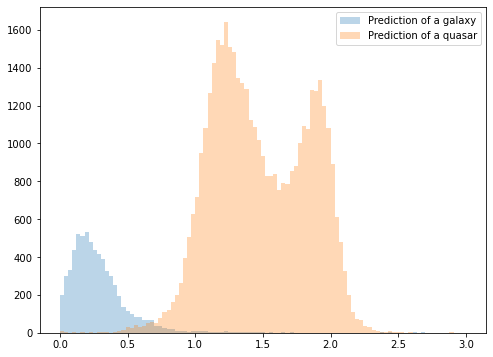

In [29]:
fig = plt.figure(figsize=(8, 6))
plt.hist(u_g[y_pred == 1], histtype = 'stepfilled', bins=np.linspace(0,3,100), alpha = 0.3, label = 'Prediction of a galaxy')
plt.hist(u_g[y_pred == 0], histtype = 'stepfilled', bins=np.linspace(0,3,100), alpha = 0.3, label = 'Prediction of a quasar')
plt.legend();

In [37]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from matplotlib import colors
from sklearn.naive_bayes import GaussianNB

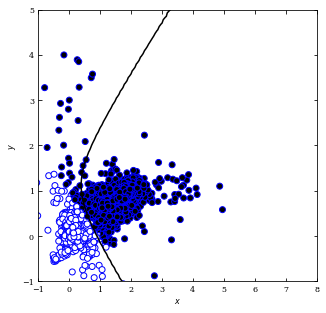

In [42]:
X = np.hstack([u_g[:, np.newaxis], g_r[:, np.newaxis]])

y = (X[:,0] + X[:,1] > 1).astype(int) #Class 1 if sum of both features is >1'''

gnb = GaussianNB()
gnb.fit(X,y)

y_pred = gnb.predict(X)

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
'''# Simulate some data
np.random.seed(0)
mu1 = [1, 1]
cov1 = 0.3 * np.eye(2)

mu2 = [5, 3]
cov2 = np.eye(2) * np.array([0.4, 0.1])

X = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                    np.random.multivariate_normal(mu2, cov2, 100)])
y = np.zeros(200)
y[100:] = 1'''

#------------------------------------------------------------
# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# predict the classification probabilities on a grid
xlim = (-1, 8)
ylim = (-1, 5)
#xlim = (np.min(X[:, 0]), np.max(X[:, 0])) 
#ylim = (np.min(X[:, 1]), np.max(X[:, 1]))
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
# Gives probability for both class 1 and class 2 for each grid point
# As these are degenerate, take just one and then
# re-shape it to the grid pattern needed for contour plotting
Z = Z[:, 1].reshape(xx.shape)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary, zorder=2)


# Add the decision boundary, which is just the contour where
# the probability exceeds some threshold, here 0.5.
ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()